# AirBnB Price Prediction

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Data Acquisition & Exploration

In [2]:
df = pd.read_csv('dataset.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.shape

(48895, 16)

### Exploratory Data Analysis

In [5]:
#identifying insignificant Features
def coefpval(x,y):
    x=x[x.corr().columns]
    from scipy import stats
    ls=[]
    for i in range(x.shape[1]):
        ls.append(stats.pearsonr(x.iloc[:,i], y)  )
    copv=pd.DataFrame(ls,index=x.columns,columns= ['Pearson-Coeff','P-Value'])
    copv['P-Ind'] = pd.cut(copv['P-Value'], bins =[0, 0.001, 0.05,0.1, 1.0], labels=['Strong','Moderate','Weak','Insignificant'], include_lowest=True )
    copv['C-Ind'] = pd.cut(copv['Pearson-Coeff'], bins =[-1.0,0, 1.0], labels=['Negative','Positive'], include_lowest=True )
    
    return copv

# Function of multi-Correlation
def multicorrelation(data, threshold=0.80):
    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = data.corr()
    
    print('  \n    Correlation with more than :',threshold)
    print('\n\nCorr Value',"\t",'Fearture1', "\t\t\t\t", 'Feature 2')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                print(f'{corr_matrix.iloc[i, j].round(5):<{16}} {corr_matrix.columns[i]:{39}} {corr_matrix.columns[j]:{40}}')
                     
    print('\n\n The above mentioned correlations only are present in the given Dataset')

### Relationship between Numerical(Continuous) variables and the Target variable

In [6]:
x=df.dropna().drop('price',axis=1)
y= df.dropna()['price']

In [7]:
display(coefpval(x,y))

,Pearson-Coeff,P-Value,P-Ind,C-Ind
id,-0.006696,1.870667e-01,Insignificant,Negative
host_id,0.006263,2.172186e-01,Insignificant,Positive
latitude,0.031344,6.529758e-10,Strong,Positive
longitude,-0.155298,4.228450e-208,Strong,Negative
minimum_nights,0.025501,5.030048e-07,Strong,Positive
number_of_reviews,-0.035924,1.438829e-12,Strong,Negative
reviews_per_month,-0.030623,1.591501e-09,Strong,Negative
calculated_host_listings_count,0.052895,1.831175e-25,Strong,Positive
availability_365,0.078276,8.034109e-54,Strong,Positive


From the above results we can see that the `id` and `host_id` are insignificant relationship with the Target variable `price`

In [8]:
multicorrelation(df,threshold=0.5)

  
    Correlation with more than : 0.5


Corr Value 	 Fearture1 				 Feature 2
0.58829          host_id                                 id                                      
0.54987          reviews_per_month                       number_of_reviews                       


 The above mentioned correlations only are present in the given Dataset


and the correlation within Independent variables are lesser than 0.7 , hence we doesn't have to remove them

<AxesSubplot:>

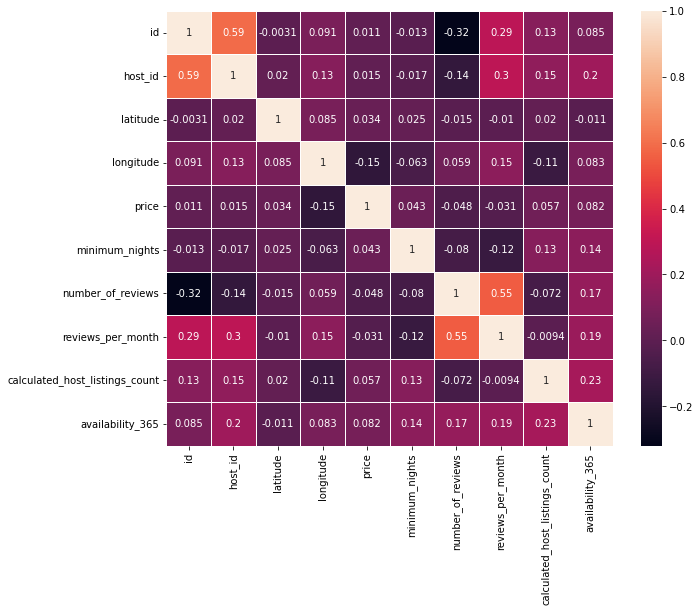

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),linecolor='white',linewidths=1,annot=True)


<Figure size 3000x2000 with 0 Axes>

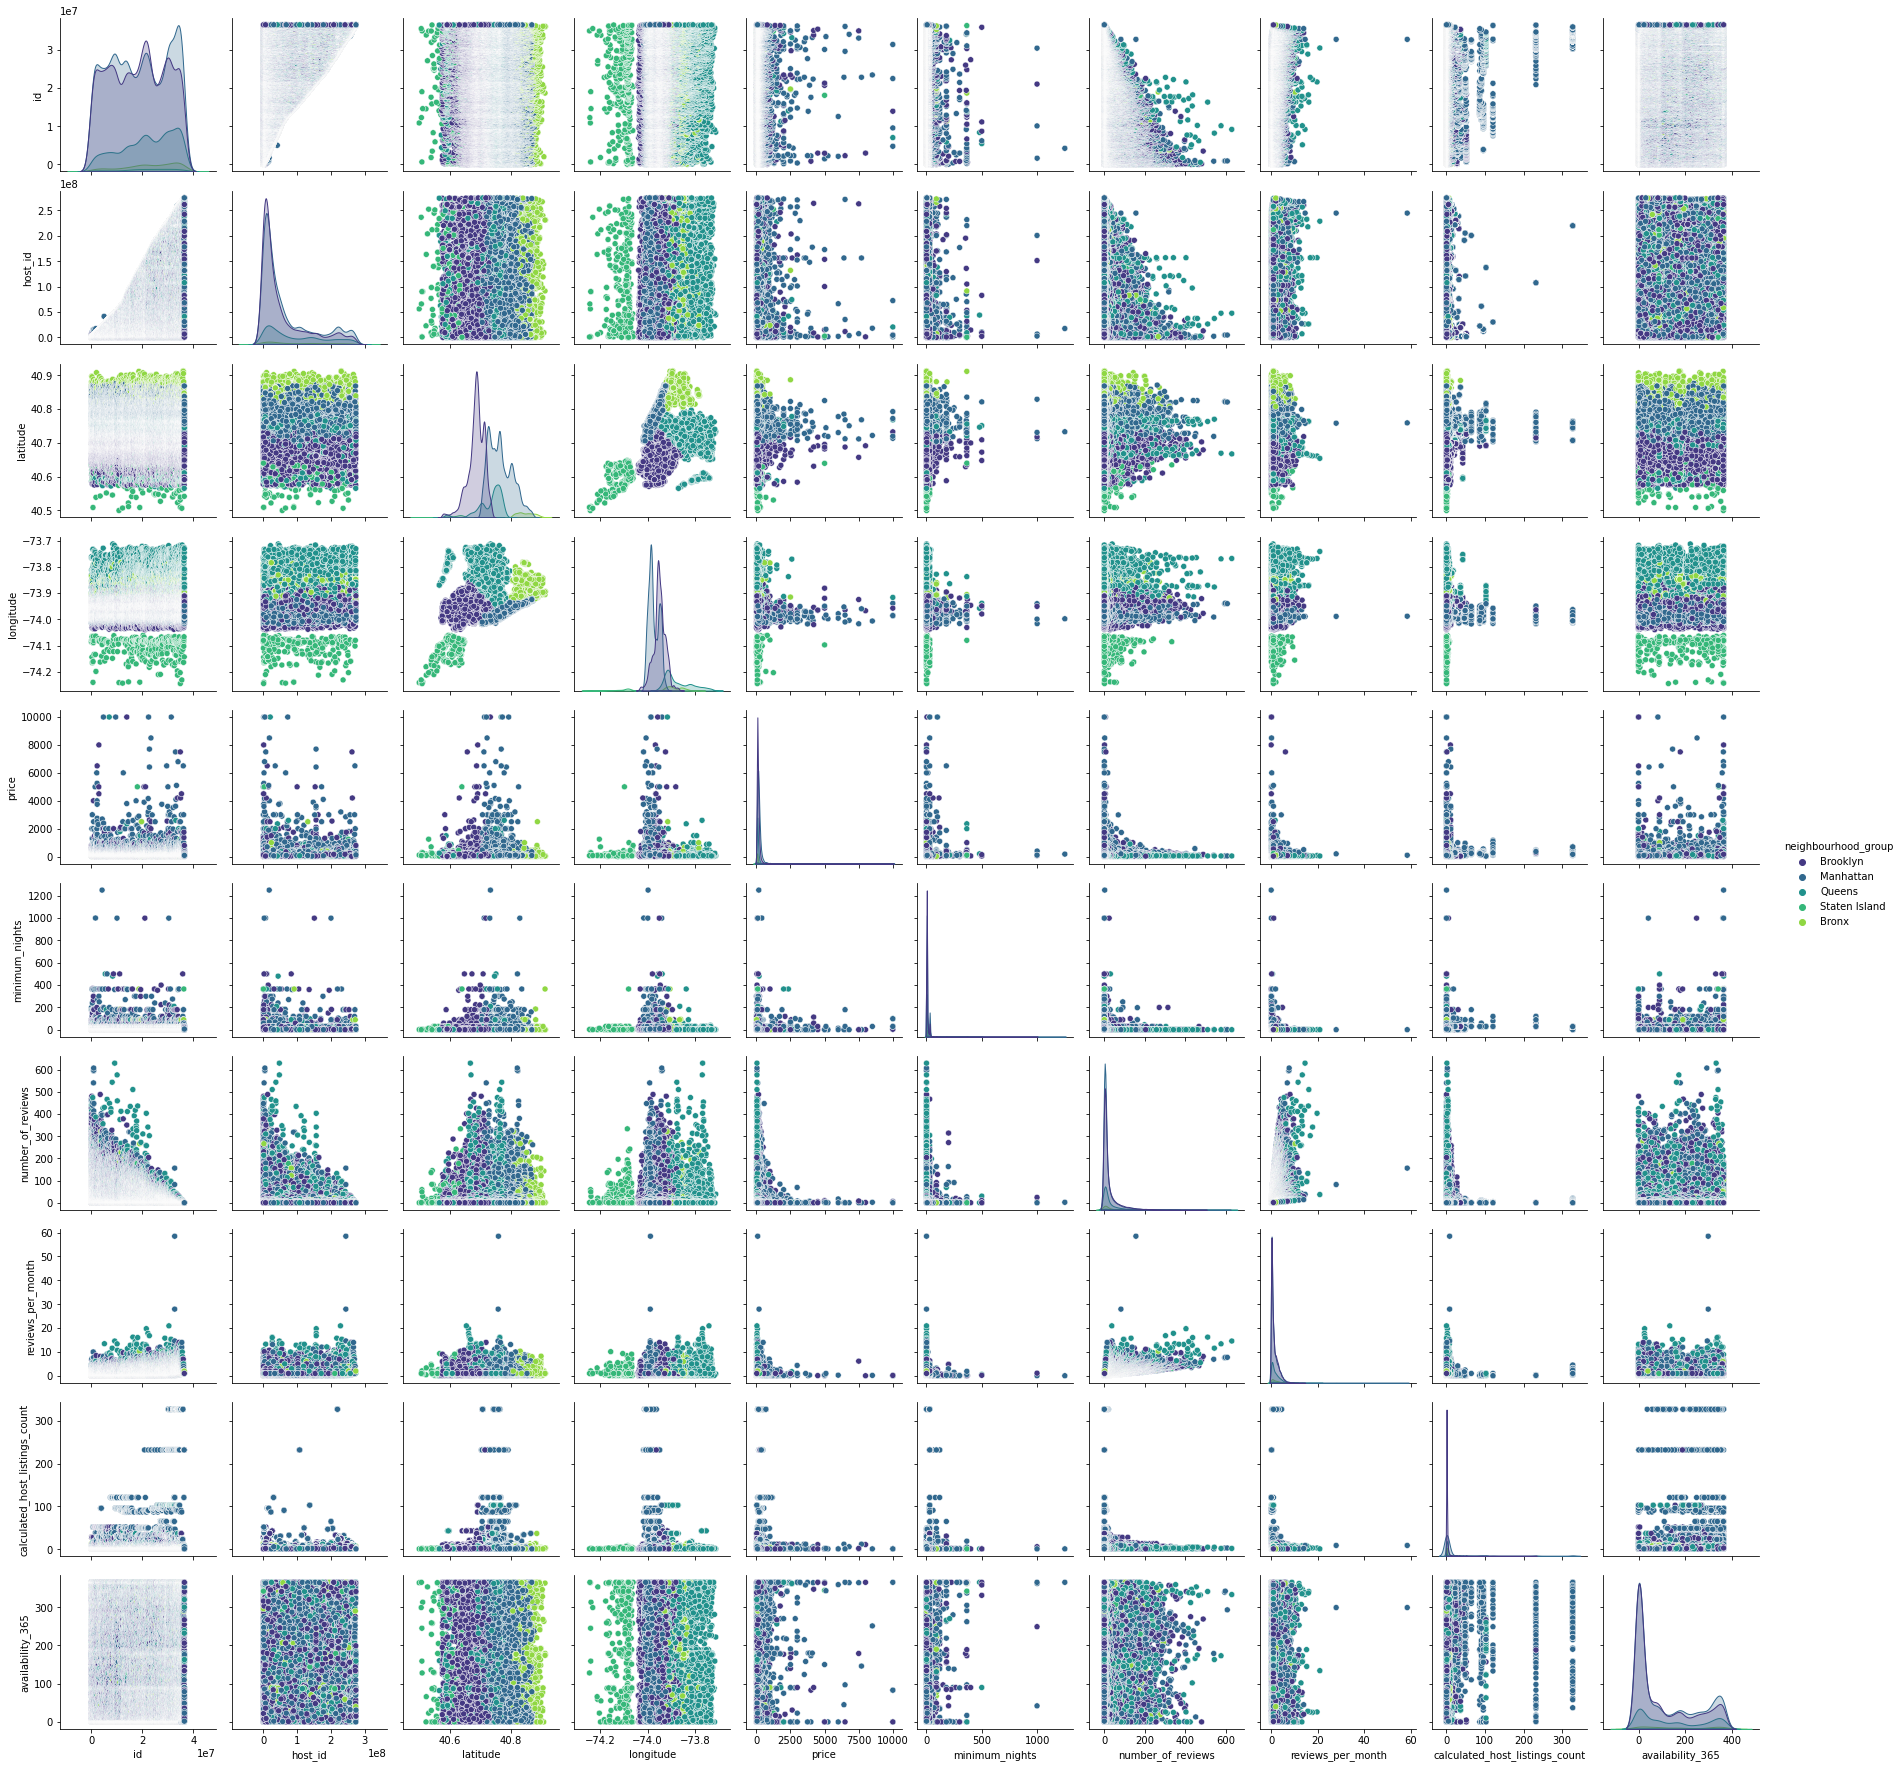

In [10]:
plt.figure(dpi=500)
sns.pairplot(df,hue='neighbourhood_group',palette='viridis')

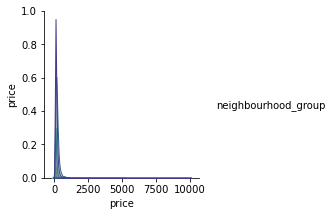

In [11]:
sns.pairplot(x_vars='price',y_vars='price',data=df,hue='neighbourhood_group',palette='viridis',size =3)

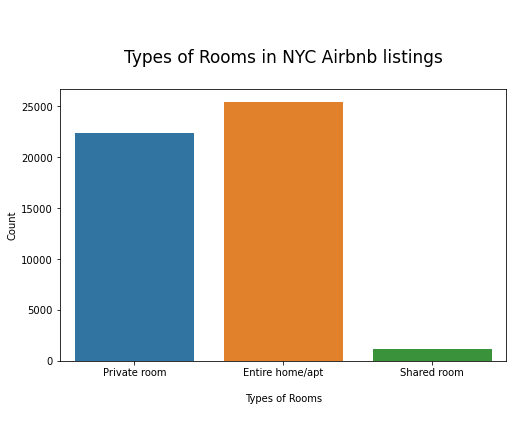

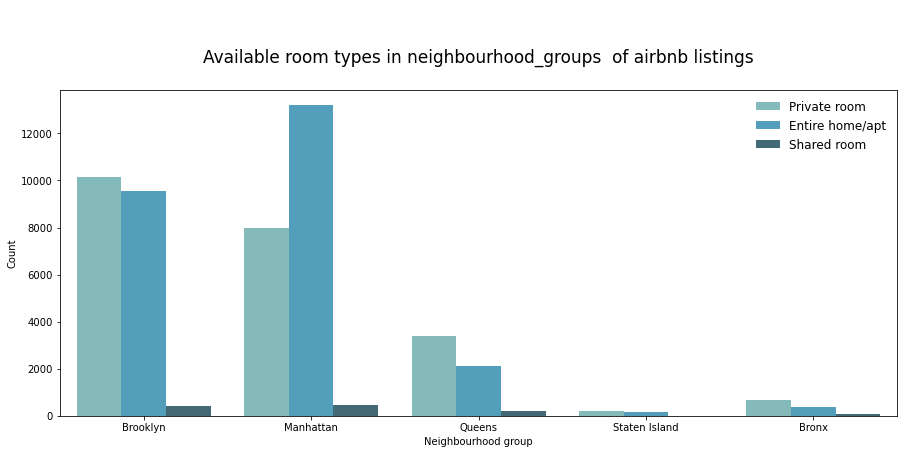

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(df['room_type'])
plt.title('\n\nTypes of Rooms in NYC Airbnb listings\n', fontsize=17)
plt.xlabel('\nTypes of Rooms\n')
plt.ylabel("Count")
plt.show()
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='neighbourhood_group', hue='room_type', palette='GnBu_d')
plt.title('\n\nAvailable room types in neighbourhood_groups  of airbnb listings\n', fontsize=17)
plt.xlabel('Neighbourhood group')
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12)
plt.show()

In [13]:
display(df[['neighbourhood_group','room_type','id']].groupby(['neighbourhood_group','room_type']).count())

id
neighbourhood_group room_type             
Bronx               Entire home/apt    379
                    Private room       652
                    Shared room         60
Brooklyn            Entire home/apt   9559
                    Private room     10132
                    Shared room        413
Manhattan           Entire home/apt  13199
                    Private room      7982
                    Shared room        480
Queens              Entire home/apt   2096
                    Private room      3372
                    Shared room        198
Staten Island       Entire home/apt    176
                    Private room       188
                    Shared room          9

### Data Wrangling & Pre-Processing 

1. Identify and handling missing values
2. Data Formatting (categorical to numerical, changing datatypes)
3. Categorical data transformation (One-Hot Encoding)
4. Duplicates Removal
5. Skewness
6. Outliers

In [14]:
display(pd.concat([df.isnull().sum().sort_values(ascending =False),((df.isnull().sum() / len(df))*100).sort_values(ascending = False)],axis = 1,keys = ['Total','Percent %']))

,Total,Percent %
last_review,10052,20.558339
reviews_per_month,10052,20.558339
host_name,21,0.042949
name,16,0.032723
id,0,0.000000
host_id,0,0.000000
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


In [15]:
#filling the NaN values with 0 for 'reviews_per_month' variable
df['reviews_per_month'].fillna(0,inplace=True)

In [16]:
df.drop(['id','name','host_id','host_name','last_review'],axis=1,inplace=True)

In [17]:
# for the rest of the variables we will just drop the NaN entries
df.dropna(inplace=True)

In [18]:
# Checking the shape of the dataset after dropping the NaN values
df.shape

(48895, 11)

In [19]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Now, all the NaN values are removed from the Dataframe

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [21]:
df1= pd.get_dummies(df)
df1.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,...,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,0.00,1,365,0,0,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,...,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


after one-hot encoding we will be having 237 columns

In [22]:
df1.shape

(48895, 237)

Now lets check the skewness for the important variables alone and normalize it


In [23]:
df1[['price','minimum_nights','calculated_host_listings_count','reviews_per_month','availability_365' ]].skew()

price                             19.118939
minimum_nights                    21.827275
calculated_host_listings_count     7.933174
reviews_per_month                  3.300723
availability_365                   0.763408
dtype: float64

Before normalization using logrithmic transformation

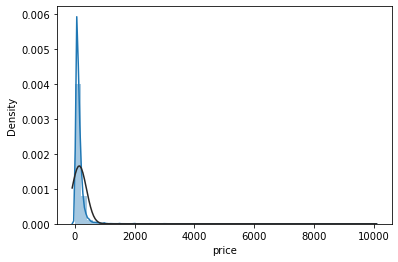

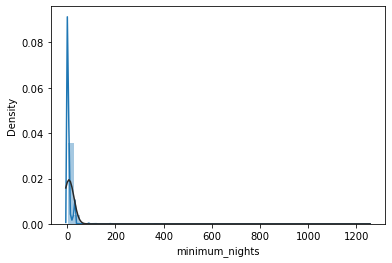

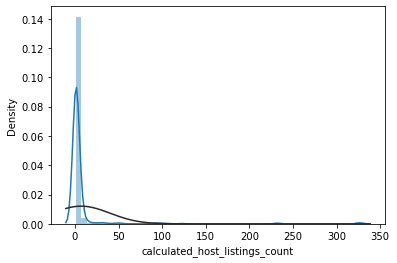

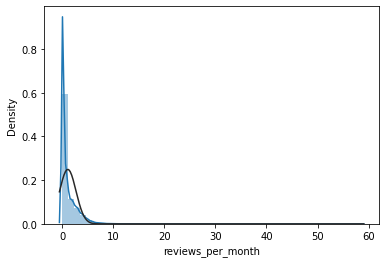

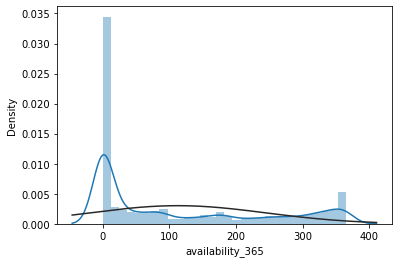

In [24]:
from scipy.stats import norm
for col in ['price','minimum_nights','calculated_host_listings_count','reviews_per_month','availability_365']:
    fig = plt.figure(figsize = (6,4))
    sns.distplot(df1[col], fit=norm);
    plt.xlabel(col)
    plt.show()

In [25]:
#applying log transformation
df1['log_price'] = np.log1p(df1['price'])
df1['log_minimum_nights'] = np.log1p(df1['minimum_nights'])
df1['log_calculated_host_listings_count'] = np.log1p(df1['calculated_host_listings_count'])
df1['log_reviews_per_month'] = np.log1p(df1['reviews_per_month'])
df1['log_availability_365'] = np.log1p(df1['availability_365'])

In [26]:
df1.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,...,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,log_price,log_minimum_nights,log_calculated_host_listings_count,log_reviews_per_month,log_availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,...,0,0,0,1,0,5.010635,0.693147,1.945910,0.190620,5.902633
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,...,0,0,1,0,0,5.420535,0.693147,1.098612,0.322083,5.874931
2,40.80902,-73.94190,150,3,0,0.00,1,365,0,0,...,0,0,0,1,0,5.017280,1.386294,0.693147,0.000000,5.902633
3,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,...,0,0,1,0,0,4.499810,0.693147,0.693147,1.729884,5.273000
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,...,0,0,1,0,0,4.394449,2.397895,0.693147,0.095310,0.000000


After Logrithmic transformation


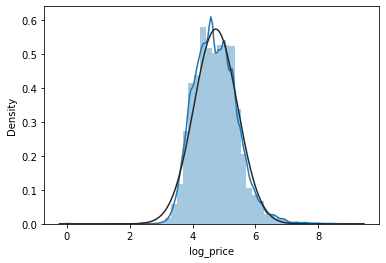

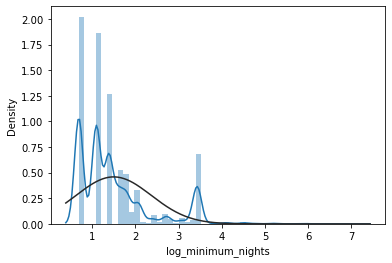

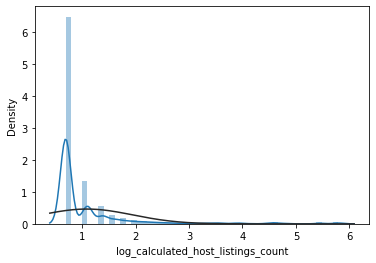

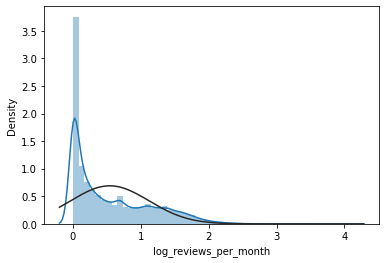

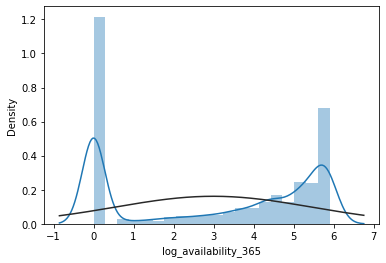

In [27]:
from scipy.stats import norm
for col in ['log_price','log_minimum_nights','log_calculated_host_listings_count','log_reviews_per_month','log_availability_365']:
    fig = plt.figure(figsize = (6,4))
    sns.distplot(df1[col], fit=norm);
    plt.xlabel(col)
    plt.show()

To deal with the outliers we will be using robust scaler(after the test train split) as it will nullify the effect of it

### Data Partitioning

In [28]:
df=df1.drop(['price','minimum_nights','calculated_host_listings_count','reviews_per_month','availability_365'],axis=1)


In [29]:
df.shape

(48895, 237)

In [30]:
df.head()

,latitude,longitude,number_of_reviews,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,...,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,log_price,log_minimum_nights,log_calculated_host_listings_count,log_reviews_per_month,log_availability_365
0,40.64749,-73.97237,9,0,1,0,0,0,0,0,...,0,0,0,1,0,5.010635,0.693147,1.945910,0.190620,5.902633
1,40.75362,-73.98377,45,0,0,1,0,0,0,0,...,0,0,1,0,0,5.420535,0.693147,1.098612,0.322083,5.874931
2,40.80902,-73.94190,0,0,0,1,0,0,0,0,...,0,0,0,1,0,5.017280,1.386294,0.693147,0.000000,5.902633
3,40.68514,-73.95976,270,0,1,0,0,0,0,0,...,0,0,1,0,0,4.499810,0.693147,0.693147,1.729884,5.273000
4,40.79851,-73.94399,9,0,0,1,0,0,0,0,...,0,0,1,0,0,4.394449,2.397895,0.693147,0.095310,0.000000


In [31]:
df.to_csv(r'C:\Univ\3rd Semester\Programming for Data Science\pjt\abnbfin.csv')

In [32]:
df = pd.read_csv(r'C:\Univ\3rd Semester\Programming for Data Science\pjt\abnbfin.csv',index_col=0)

In [33]:
df.shape

(48895, 237)

In [34]:
df.head()

,latitude,longitude,number_of_reviews,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,...,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,log_price,log_minimum_nights,log_calculated_host_listings_count,log_reviews_per_month,log_availability_365
0,40.64749,-73.97237,9,0,1,0,0,0,0,0,...,0,0,0,1,0,5.010635,0.693147,1.945910,0.190620,5.902633
1,40.75362,-73.98377,45,0,0,1,0,0,0,0,...,0,0,1,0,0,5.420535,0.693147,1.098612,0.322083,5.874931
2,40.80902,-73.94190,0,0,0,1,0,0,0,0,...,0,0,0,1,0,5.017280,1.386294,0.693147,0.000000,5.902633
3,40.68514,-73.95976,270,0,1,0,0,0,0,0,...,0,0,1,0,0,4.499810,0.693147,0.693147,1.729884,5.273000
4,40.79851,-73.94399,9,0,0,1,0,0,0,0,...,0,0,1,0,0,4.394449,2.397895,0.693147,0.095310,0.000000


In [35]:
x=df.drop(['log_price'],axis=1)
y=df['log_price']

In [36]:
print(x.shape,y.shape)

(48895, 236) (48895,)


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=42)

In [39]:
print(x_train.shape,y_train.shape)

(34226, 236) (34226,)


In [40]:
print(x_test.shape,y_test.shape)

(14669, 236) (14669,)


### Feature Scaling

In [41]:
from sklearn.preprocessing import RobustScaler

In [42]:
scale= RobustScaler()

In [43]:
x_train_sc=scale.fit_transform(x_train)
x_test_sc=scale.transform(x_test)

In [44]:
print(x_train_sc.shape,x_test_sc.shape)

(34226, 236) (14669, 236)


Model Evaluation strategy (Metrics Selection)

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### KNN Regressor

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knnparameters = {
    'n_neighbors':range(15,25)
}
reg = GridSearchCV(KNeighborsRegressor(), knnparameters,return_train_score=True, cv = 5,n_jobs=-1)
reg.fit(x_train_sc, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': range(15, 25)},
             return_train_score=True)

In [47]:
reg.best_params_

{'n_neighbors': 16}

In [48]:
reg.best_score_

0.5409008258075805

In [49]:
results=pd.DataFrame(reg.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.196123,0.049537,6.347702,0.090257,15,{'n_neighbors': 15},0.542721,0.543875,0.561268,0.528682,...,0.540857,0.012243,2,0.599481,0.597723,0.594303,0.602588,0.601996,0.599218,0.003018
1,0.136688,0.016362,6.188438,0.192657,16,{'n_neighbors': 16},0.542440,0.543622,0.562384,0.527591,...,0.540901,0.012673,1,0.596333,0.594953,0.590303,0.598578,0.598530,0.595739,0.003045
2,0.147632,0.041952,5.928439,0.055926,17,{'n_neighbors': 17},0.541132,0.542459,0.562624,0.528141,...,0.540684,0.012467,3,0.592974,0.592069,0.587080,0.594978,0.595134,0.592447,0.002927
3,0.128301,0.044338,5.888992,0.086669,18,{'n_neighbors': 18},0.539935,0.541279,0.563483,0.528339,...,0.540268,0.012849,4,0.590180,0.589246,0.584026,0.592095,0.591939,0.589497,0.002939
4,0.109582,0.023178,6.104150,0.074699,19,{'n_neighbors': 19},0.538493,0.541102,0.563531,0.528656,...,0.539890,0.012945,5,0.587370,0.586422,0.580928,0.589360,0.589360,0.586688,0.003098
5,0.095204,0.014328,6.033636,0.136207,20,{'n_neighbors': 20},0.538203,0.541351,0.563367,0.528927,...,0.539713,0.013036,6,0.584751,0.583935,0.578695,0.587001,0.587365,0.584350,0.003112
6,0.079466,0.012962,5.814469,0.288349,21,{'n_neighbors': 21},0.538665,0.541057,0.563503,0.528814,...,0.539564,0.013279,7,0.582589,0.581411,0.576051,0.585136,0.585444,0.582126,0.003397
7,0.099241,0.021675,6.035694,0.087935,22,{'n_neighbors': 22},0.537481,0.541400,0.563704,0.529142,...,0.539519,0.013316,8,0.580951,0.579371,0.573821,0.583056,0.583581,0.580156,0.003508
8,0.087606,0.010732,5.908324,0.047383,23,{'n_neighbors': 23},0.537770,0.541183,0.563728,0.527981,...,0.539107,0.013701,9,0.579151,0.577772,0.571809,0.580807,0.581226,0.578153,0.003402
9,0.086385,0.018980,5.117862,1.114961,24,{'n_neighbors': 24},0.537298,0.540655,0.562931,0.528305,...,0.538841,0.013328,10,0.577425,0.576019,0.570095,0.578997,0.579298,0.576367,0.003349


<div class="alert alert-block alert-success">     


From the above results we can see that the model yields the best results when `K =16` which leads to the best R<sup>2</sup> score of `0.54090087`
    <div>

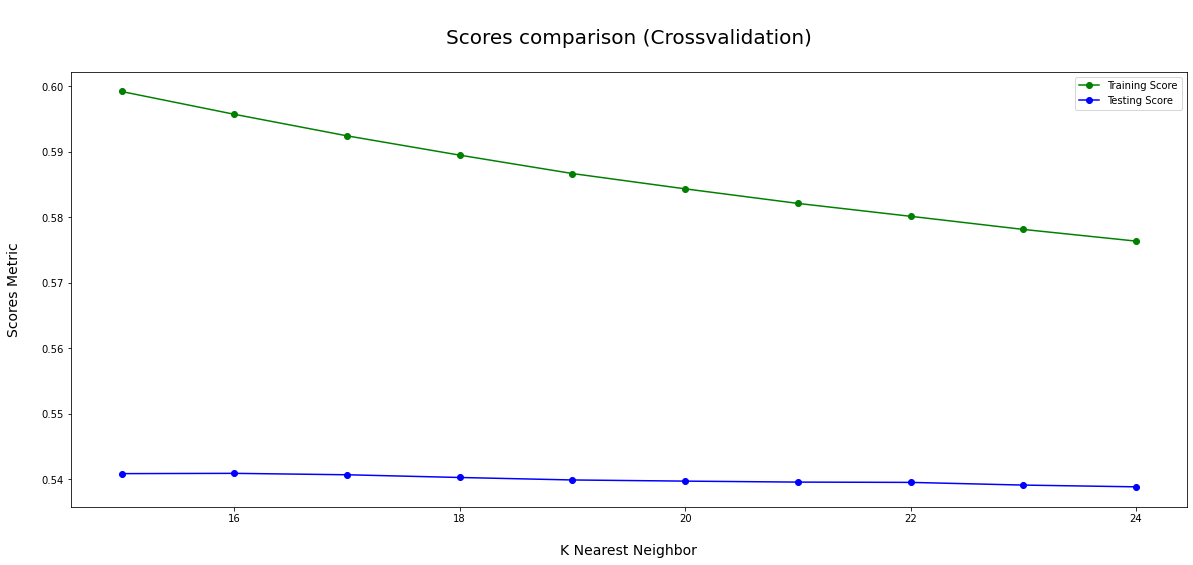

In [50]:
plt.figure(figsize=(20,8))
x_axis = list(range(15,25))
plt.plot(x_axis, results['mean_train_score'], c = 'g', label = 'Training Score',marker='o')
plt.plot(x_axis, results['mean_test_score'], c = 'b', label = 'Testing Score',marker='o')
#plt.annotate("Best Recall & PR-AUC score",fontsize=16,xy=(1, 0.78),xytext=(3, 0.82), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=2))
plt.legend(loc='best')
plt.title('\nScores comparison (Crossvalidation)\n',fontsize=20)
plt.xlabel('\nK Nearest Neighbor',fontsize=14)
plt.ylabel('Scores Metric\n',fontsize=14)
#plt.xticks(np.arange(0, 21, 1))
plt.show()

lets analyze the Crossvalidation testing score closely as we have to choose the best score

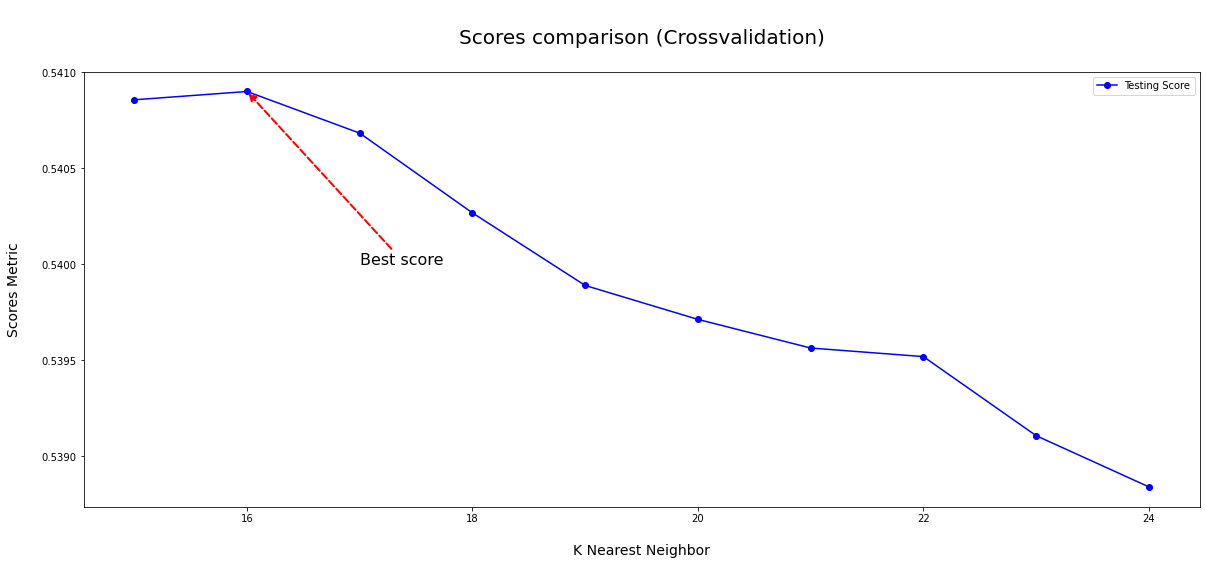

In [51]:
plt.figure(figsize=(20,8))
x_axis = list(range(15,25))
#plt.plot(x_axis, results[results['param_weights']=='distance']['mean_train_score'], c = 'g', label = 'Training Score',marker='o')
plt.plot(x_axis, results['mean_test_score'], c = 'b', label = 'Testing Score',marker='o')
plt.annotate("Best score",fontsize=16,xy=(16, 0.540901	),xytext=(17, 0.5400), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=2))
plt.legend(loc='best')
plt.title('\nScores comparison (Crossvalidation)\n',fontsize=20)
plt.xlabel('\nK Nearest Neighbor',fontsize=14)
plt.ylabel('Scores Metric\n',fontsize=14)
plt.show()

Let's calcualte the other metric scores for the best parameter of KNN model

In [52]:
pred=reg.predict(x_test_sc)

In [53]:
print(f'\nTest score without CV: {reg.score(x_test_sc,y_test)}\nMean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))} \nR2 Score: {r2_score(y_test,pred)} \nMean Absolute Error: {mean_absolute_error(y_test,pred)}')


Test score without CV: 0.5626591662491056
Mean Squared Error: 0.45464176151843816 
R2 Score: 0.5626591662491056 
Mean Absolute Error: 0.328519088709243


<div class="alert alert-block alert-success">
Let's Visualize the plot of the best fit line by the KNN model below for a sample of data with only one x variable and y variable for simplicity:
    <div>

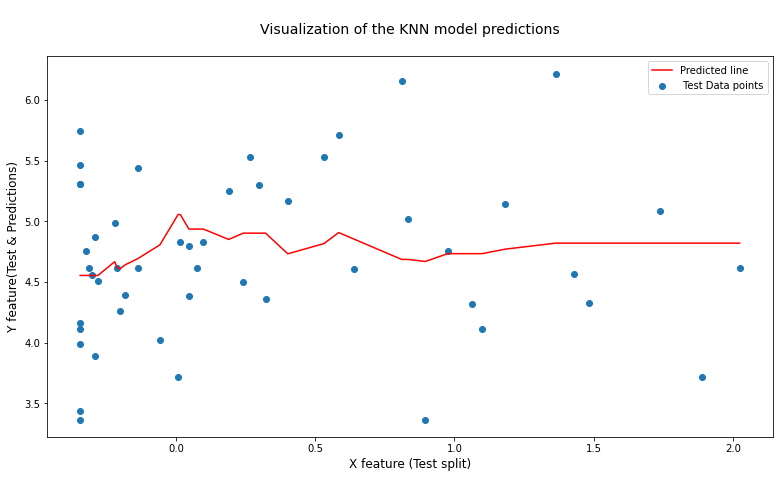

In [54]:
from sklearn.neighbors import KNeighborsRegressor
X_b = x_train_sc[:50,234].reshape(-1,1)
y_b = y_train[:50]
knn_reg = KNeighborsRegressor(16)
knn_reg.fit(X_b, y_b)
cm=pd.DataFrame({'x':x_test_sc[:50,234].tolist(),'y':y_test[:50].tolist()}).sort_values(by='x')
y_predict = knn_reg.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'r',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label=' Test Data points')
plt.title('\nVisualization of the KNN model predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

## Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
lnreg=LinearRegression()
lnreg.fit(x_train_sc,y_train)
print('\n\n"Linear Regression Model and it\'s Metrics" :\n')
print('\t• Training score of the Linear Regression Model is :',lnreg.score(x_train_sc,y_train))
print('\n\t• Testing score of the Linear Regression Model is :',lnreg.score(x_test_sc,y_test))
pred= lnreg.predict(x_test_sc)
print(f'\n\t• Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))} \n\n\t• R2 Score: {r2_score(y_test,pred)} \n\n\t• Mean Absolute Error: {mean_absolute_error(y_test,pred)}')



"Linear Regression Model and it's Metrics" :

	• Training score of the Linear Regression Model is : 0.5540050261732414

	• Testing score of the Linear Regression Model is : -3.999220191017891e+16

	• Mean Squared Error: 137482357.1765107 

	• R2 Score: -3.999220191017891e+16 

	• Mean Absolute Error: 2157659.1191043667


R<sup>2</sup>  is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.(ie) the relationship between the independent variable and the dependent variable is not a simple linear relationship and it might be a complex linear relationship which cann't be captured by as a simple Linear regression model like as above.<br><br>
A negative R<sup>2</sup> is not a mathematical impossibility or the sign of a computer bug. It simply means that the chosen model (with its constraints) fits the data really poorly.<br><br>

When the test score is relatively poor than the training score , it indicates that the model is suffering from the problem of `over-generalization` or `over-fitting` and it can be eliminated by either `'Ridge'` or `'LASSO'` model which is also known as the Regularized Linear model<div>

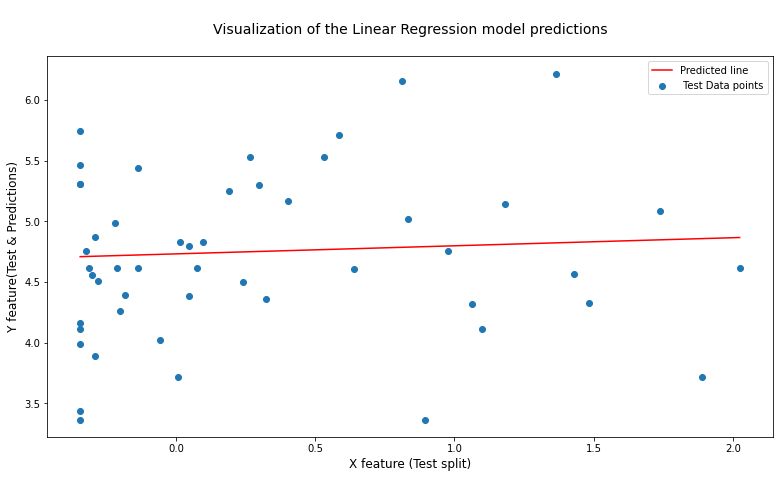

In [56]:
from sklearn.linear_model import LinearRegression

X_b = x_train_sc[:50,234].reshape(-1,1)
y_b = y_train[:50]
lnreg=LinearRegression()
lnreg.fit(X_b, y_b)
cm=pd.DataFrame({'x':x_test_sc[:50,234].tolist(),'y':y_test[:50].tolist()}).sort_values(by='x')
y_predict = lnreg.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'r',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label=' Test Data points')
plt.title('\nVisualization of the Linear Regression model predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

## Ridge Regression

In [57]:
from  sklearn.linear_model import Ridge

In [58]:
train_score_list = []
test_score_list = []
cross_score_list=[]
for alpha in [0.01,0.1,0.5,1,10,20]: 
    ridge = Ridge(alpha,random_state=41)
    scores = cross_val_score(ridge, x_train_sc, y_train, cv=5)
    print('\nFor alpha =',alpha)
    cross_score_list.append(scores.mean())
    ridge.fit(x_train_sc,y_train)
    y_pred=ridge.predict(x_test_sc)
    train_score_list.append(ridge.score(x_train_sc,y_train))
    test_score_list.append(ridge.score(x_test_sc, y_test))
    print('\n\t•Training score without Cross validation: ',train_score_list[-1])
    print('\n\t•Cross validation Training score mean:',scores.mean())
    print('\n\t•Testing score without Cross validation: ',test_score_list[-1])
    print(f'\n\t• Mean Squared Error: {(mean_squared_error(y_test, y_pred))} \n\n\t• R2 Score: {r2_score(y_test,y_pred)} \n\n\t• Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}')
    print('----------------------------------------------------------------------------')


For alpha = 0.01

	•Training score without Cross validation:  0.5540048127120981

	•Cross validation Training score mean: 0.5462540239045944

	•Testing score without Cross validation:  0.5620253380044733

	• Mean Squared Error: 0.20699869572370264 

	• R2 Score: 0.5620253380044733 

	• Mean Absolute Error: 0.32931655125361975
----------------------------------------------------------------------------

For alpha = 0.1

	•Training score without Cross validation:  0.5540000138798797

	•Cross validation Training score mean: 0.5464340278909852

	•Testing score without Cross validation:  0.5620892181965642

	• Mean Squared Error: 0.20696850421357021 

	• R2 Score: 0.5620892181965642 

	• Mean Absolute Error: 0.3292912715840534
----------------------------------------------------------------------------

For alpha = 0.5

	•Training score without Cross validation:  0.5539272327759827

	•Cross validation Training score mean: 0.5469528391094702

	•Testing score without Cross validation:  0.562

<div class="alert alert-block alert-success">     

From the above results we can see that the Ridge model yields the best results when `alpha =10` which leads to the best R<sup>2</sup> score of `0.5626008` and better than the simple Linear regression(which overfits the data)
    <div>

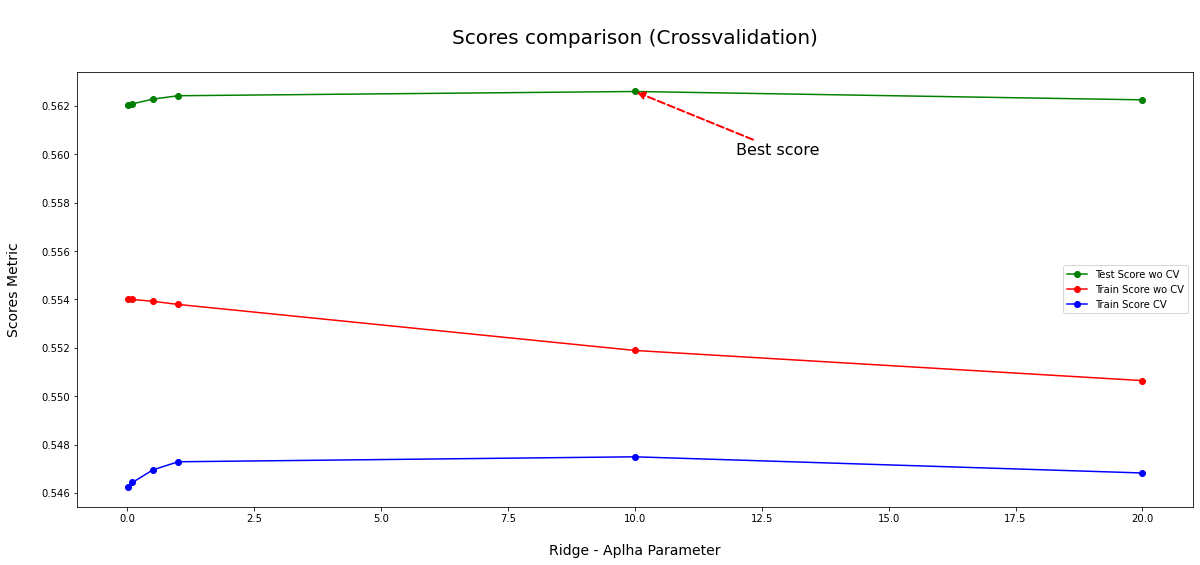

In [59]:
plt.figure(figsize=(20,8))
x_axis = [0.01,0.1,0.5,1,10,20]
plt.plot(x_axis, test_score_list , c = 'g', label = 'Test Score wo CV',marker='o')
plt.plot(x_axis, train_score_list, c = 'r', label = 'Train Score wo CV',marker='o')
plt.plot(x_axis, cross_score_list, c = 'b', label = 'Train Score CV',marker='o')
plt.annotate("Best score",fontsize=16,xy=(10, 0.5626008),xytext=(12, 0.560), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=2))
plt.legend(loc='best')
plt.title('\nScores comparison (Crossvalidation)\n',fontsize=20)
plt.xlabel('\nRidge - Aplha Parameter',fontsize=14)
plt.ylabel('Scores Metric\n',fontsize=14)
#plt.xticks(np.arange(0, 21, 1))
plt.show()

<div class="alert alert-block alert-success">
    Let's Visualize the best fitted line by the  Ridge Regression model

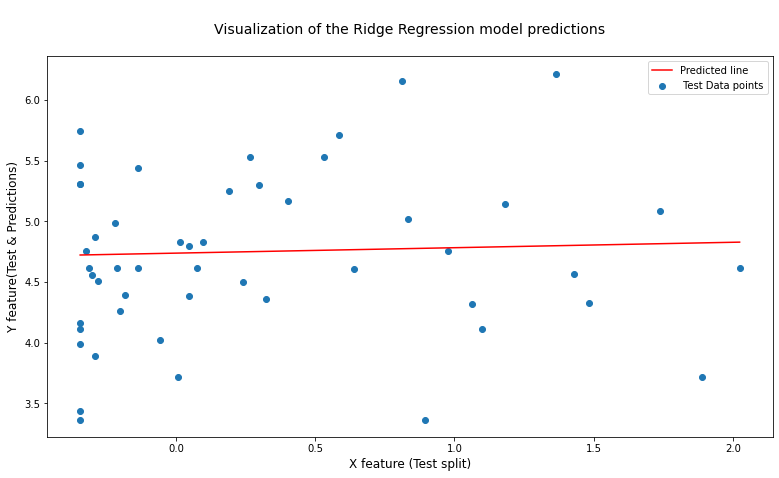

In [60]:
X_b = x_train_sc[:50,234].reshape(-1,1)
y_b = y_train[:50]
ridget = Ridge(alpha=10,random_state=41)
ridget.fit(X_b, y_b)
cm=pd.DataFrame({'x':x_test_sc[:50,234].tolist(),'y':y_test[:50].tolist()}).sort_values(by='x')
y_predict = ridget.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'r',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label=' Test Data points')
plt.title('\nVisualization of the Ridge Regression model predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

##  LASSO Regression (Least Absolute Shrinkage and Selection Operator)

In [61]:
from sklearn.linear_model import Lasso

In [62]:
train_score_list = []
test_score_list = []
cross_score_list=[]
for alpha in [0.0000001,0.00001,0.0001,0.001,0.01,0.1,0.5,0.8,1]: 
    lasso = Lasso(alpha,random_state=41,max_iter=3000)
    scores = cross_val_score(lasso, x_train_sc, y_train, cv=5)
    print('\nFor alpha =',alpha)
    cross_score_list.append(scores.mean())
    lasso.fit(x_train_sc,y_train)
    y_pred=lasso.predict(x_test_sc)
    train_score_list.append(lasso.score(x_train_sc,y_train))
    test_score_list.append(lasso.score(x_test_sc, y_test))
    print('\n\t•Training score without Cross validation: ',train_score_list[-1])
    print('\n\t•Cross validation Training score mean:',scores.mean())
    print('\n\t•Testing score without Cross validation: ',test_score_list[-1])
    print(f'\n\t• Mean Squared Error: {(mean_squared_error(y_test, y_pred))} \n\n\t• R2 Score: {r2_score(y_test,y_pred)} \n\n\t• Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}')
    print('----------------------------------------------------------------------------')


For alpha = 1e-07

	•Training score without Cross validation:  0.5540048351555318

	•Cross validation Training score mean: 0.5462556669133853

	•Testing score without Cross validation:  0.5620125301114585

	• Mean Squared Error: 0.20700474908107486 

	• R2 Score: 0.5620125301114585 

	• Mean Absolute Error: 0.3293211384669914
----------------------------------------------------------------------------

For alpha = 1e-05

	•Training score without Cross validation:  0.553782571426656

	•Cross validation Training score mean: 0.5470157955525781

	•Testing score without Cross validation:  0.562222821831876

	• Mean Squared Error: 0.2069053595144511 

	• R2 Score: 0.562222821831876 

	• Mean Absolute Error: 0.3292083291731222
----------------------------------------------------------------------------

For alpha = 0.0001

	•Training score without Cross validation:  0.549894448002058

	•Cross validation Training score mean: 0.5468485355901436

	•Testing score without Cross validation:  0.561

<div class="alert alert-block alert-success">

From the above results we can see that the LASSO model yields the best results when `alpha =1e-05` which leads to the best R<sup>2</sup> score of `0.5622228` and better than the simple Linear regression(which overfits the data)
    <div>

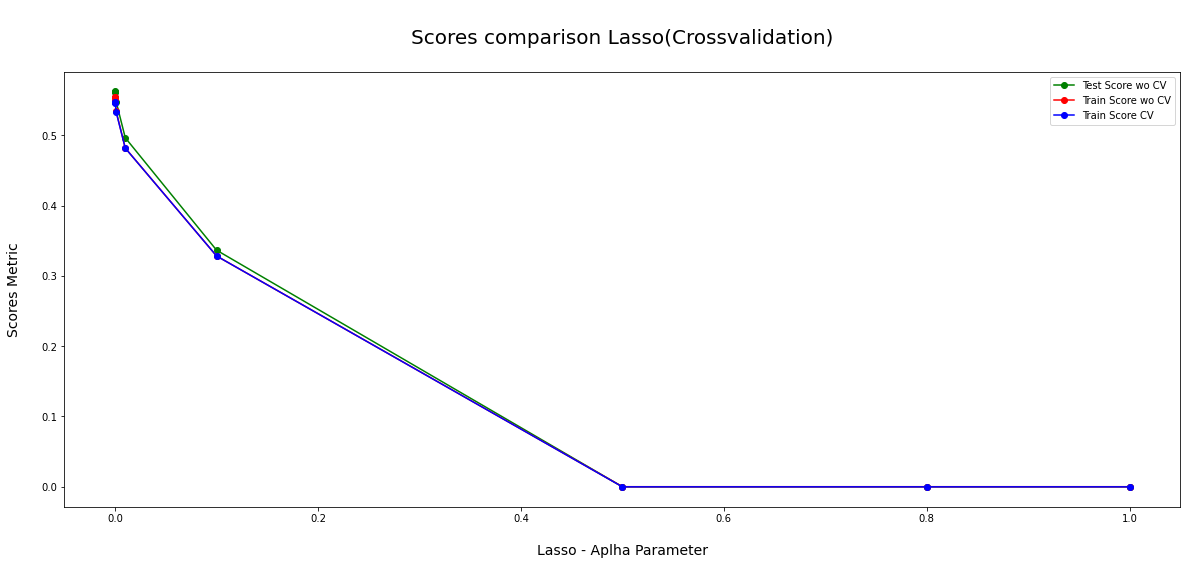

In [63]:
plt.figure(figsize=(20,8))
x_axis = [0.0000001,0.00001,0.0001,0.001,0.01,0.1,0.5,0.8,1]
plt.plot(x_axis, test_score_list, c = 'g', label = 'Test Score wo CV',marker='o')
plt.plot(x_axis, train_score_list, c = 'r', label = 'Train Score wo CV',marker='o')
plt.plot(x_axis, cross_score_list , c = 'b', label = 'Train Score CV',marker='o')
#plt.annotate("Best score",fontsize=16,xy=(10, 0.5626008),xytext=(12, 0.560), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=2))
plt.legend(loc='best')
plt.title('\nScores comparison Lasso(Crossvalidation)\n',fontsize=20)
plt.xlabel('\nLasso - Aplha Parameter',fontsize=14)
plt.ylabel('Scores Metric\n',fontsize=14)
#plt.xticks(np.arange(0, 21, 1))
plt.show()

Let's Visualize closely to the required parameters only

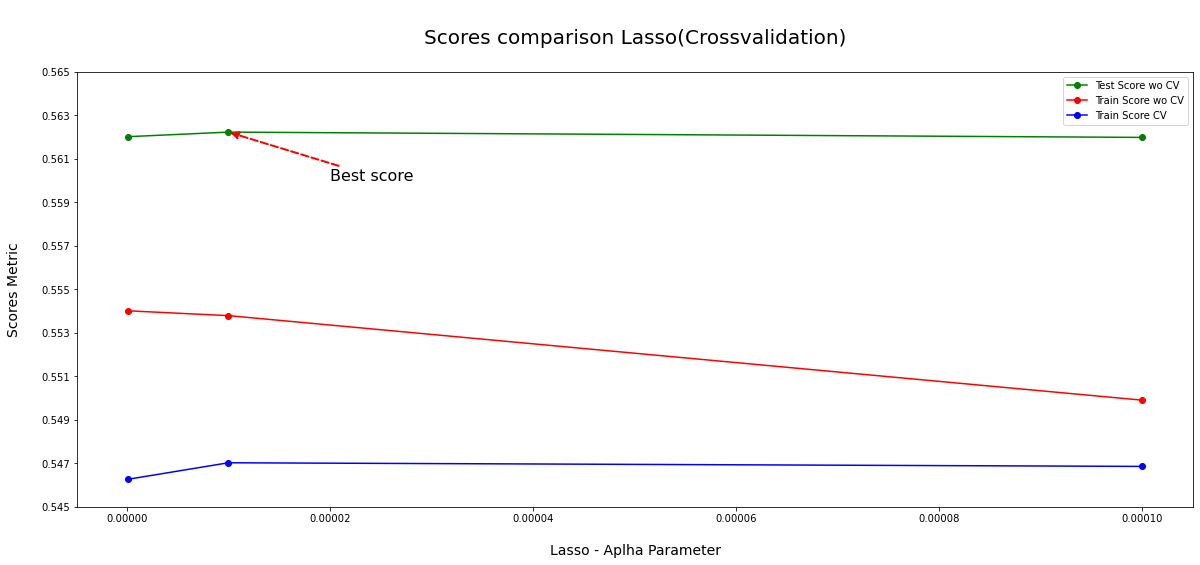

In [64]:
plt.figure(figsize=(20,8))
x_axis = [0.0000001,0.00001,0.0001]
plt.plot(x_axis, test_score_list[:3], c = 'g', label = 'Test Score wo CV',marker='o')
plt.plot(x_axis, train_score_list[:3], c = 'r', label = 'Train Score wo CV',marker='o')
plt.plot(x_axis, cross_score_list[:3] , c = 'b', label = 'Train Score CV',marker='o')
plt.annotate("Best score",fontsize=16,xy=(0.00001, 0.562222),xytext=(0.00002, 0.560), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=2))
plt.legend(loc='best')
plt.title('\nScores comparison Lasso(Crossvalidation)\n',fontsize=20)
plt.xlabel('\nLasso - Aplha Parameter',fontsize=14)
plt.ylabel('Scores Metric\n',fontsize=14)
plt.yticks(np.arange(0.545, 0.566, 0.002))
plt.show()

<div class="alert alert-block alert-success">Let's visualize the best fitted line by the LASSO Model 

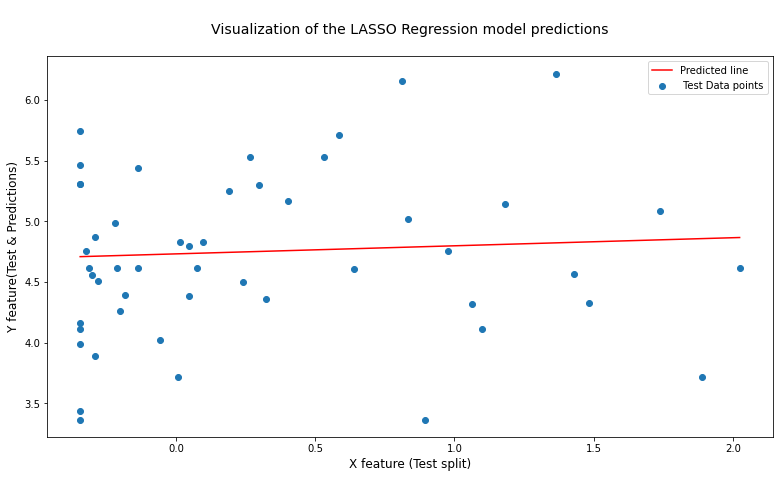

In [65]:
X_b = x_train_sc[:50,234].reshape(-1,1)
y_b = y_train[:50]
lassot = Lasso(alpha=0.00001,random_state=41,max_iter=3000)
lassot.fit(X_b, y_b)
cm=pd.DataFrame({'x':x_test_sc[:50,234].tolist(),'y':y_test[:50].tolist()}).sort_values(by='x')
y_predict = lassot.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'r',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label=' Test Data points')
plt.title('\nVisualization of the LASSO Regression model predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()